# Tarea 6: Neuroevolución


# Jose Andrés Aguilar Salas
# Adriana Rojas Mesén

### INTRODUCCIÓN

La computación evolutiva tiene como objetivo imitar procesos de la evolución natural, donde el concepto principal es la supervivencia del más apto: el débil debe morir. En la evolución natural, la supervivencia se logra mediante la reproducción. La descendencia, reproducida de dos o más padres, contiene material genético de estos. Aquellos individuos que heredan malas características son débiles y pierden la batalla por sobrevivir. [2]

Un posible ámbito de aplicación la computación evolutiva, consistía en evolucionar los pesos de una red neuronal. No obstante, muchos investigadores determinaron que ese no era el más adecuado o eficiente. Por lo que surge el concepto Neuroevolución, sin embargo, surgen muchas dudas y problemas, hasta que, en el año 2002, Stanley y Miikkulainen presentan el algoritmo NEAT. [1]

Un inconveniente de las redes neuronales clásicas es que estas tienen una gran cantidad de parámetros que se deben ajustar, de manera que se obtenga un resultado satisfactorio. Por ejemplo, se debe conocer cuántas iteraciones se deben de realizar, se deben ajustar los pesos de cada conexión entre neuronas, la tasa de aprendizaje de la red, se debe ajustar la manera en que se conectará la red, entre otras. Realizar el ajuste de cada uno de estos parámetros puede resultar un poco tedioso, por lo que, ante esto surge el algoritmo NEAT. [1]

Este algoritmo permite obtener una evolución en la topología de la red, de manera que ya no es necesario plantear cómo se realizarán las conexiones. Para este algoritmo no es necesario realizar una definición del cromosoma, ya que este es de longitud variable. Además, tiene 2 tipos de genes, los genes de nodo y conexión. Estos genes tienen la forma que se muestra en la figura 1. En el caso de los genes de nodo, estos describen a cada una de las neuronas de la red, mientras que los genes de conexión describen las características de la conexión entre las distintas neuronas.

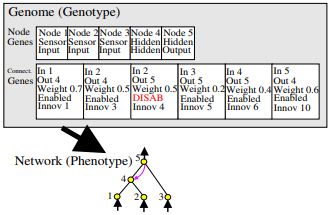
 
                                    Figura 1: Forma de los genes que conforman el algoritmo NEAT.





El algoritmo NEAT, por lo general, comienza con una topología muy simple para la red y, a medida que se van dando las mutaciones en la población inicial, se comienza a aumentar el tamaño. De manera que se obtienen redes con topologías más complejas y cercanas a lo que se quiere obtener.

Con las redes que se crean con el algoritmo NEAT, también se realiza un proceso de recombinación, en el que se tienen los siguientes genes:

###### Genes “correspondientes” (matching): 
Tomando una pareja de progenitores, son los genes para los cuales se comparte el mismo índice de innovación, independientemente de su estado de activación o peso correspondiente a una conexión.
###### Genes “disjuntos” (disjoint): 
Son genes relacionados a una pareja de progenitores que no son compartidos, pero están dentro del rango de innovación común a los progenitores.
###### Genes “en exceso” (excess): 
Son genes relacionados a una pareja de progenitores cuando no están compartidos y además están fuera del rango de innovación común.







### DESCRIPCIÓN DEL PROBLEMA

La Neuroevolución es construir de manera automática redes neuronales eficientes y que estén adecuadamente parametrizadas para servir como “mapeadores” o “modeladores” de ciertos problemas.
En esta tarea, se requiere desarrollar por medio de NEAT la solución a un problema que ya haya sido resuelto mediante el método de ANN y de la cual ya se conozca la solución a nivel de ANN. Se debe realizar un estudio de la mejor configuración de parámetros del evolutivo, verificando que la configuración alcanza su mejor resultado posible. Además realizar una comparación de ambas soluciones neuronales entre NEAT contra la resolución por medio de la construcción de la ANN de manera tradicional.




### METODOLOGÍA

Para la realización de este problema basado en neuroevolución, primeramente, se realiza una investigación acerca de algún problema, preferiblemente básico o sencillo, que se pueda resolver mediante el método de ANN y de la cual ya se conozca la solución a nivel de ANN.

Se define el problema a resolver como el de una XOR, ya que, aunque esta tarea es simple, requiere el crecimiento de unidades ocultas y, por lo tanto, sirve como una prueba simple para el método.

Luego, se plantea una función objetivo que permita definir cuándo se está obteniendo un resultado satisfactorio. Una vez se define esta función, se debe de configurar el archivo Config. Este archivo permite definir los parámetros de la biblioteca NEAT de Python, como lo son la cantidad de entradas y salidas, población inicial, etc. Que serán comentadas más adelante.

En este caso se plantea variar los parámetros manualmente, hasta obtener los mejores resultados posibles. Para realizar el análisis se plantea variar la tasa de mutación y el tamaño de la población inicial del evolutivo. Por otro lado se prueba con diferentes funciones de activación, primeramente se hará con sigmoide, si esta no resulta con buenos resultados, para la red neuronal, se puede variar la función de activación y así observar cómo varían los resultados.

Finalmente, como parte del análisis, se realizará la comparación entre los resultados obtenidos mediante el método de ANN y los resultados obtenidos en esta tarea de neuroevolución.






### PROBLEMA XOR
Una XOR, cuya tabla de verdad se muestra a continuación:

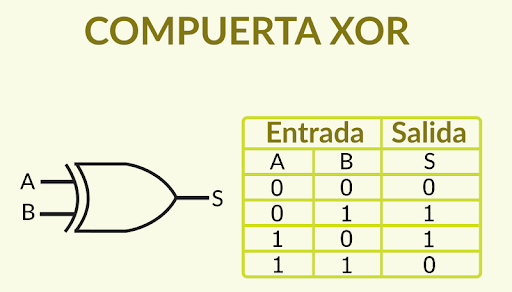
 


no es separable linealmente, por lo que una red neuronal requiere unidades ocultas para resolverlo. Las dos entradas deben combinarse en alguna unidad oculta, a diferencia de solo en el nodo de salida, porque no hay una función sobre una combinación lineal de las entradas que pueda separar las entradas en las clases adecuadas.

 Estos requisitos estructurales hacen que XOR sea adecuado para probar la capacidad de NEAT para evolucionar la estructura. Por ejemplo, el método de NEAT para agregar nuevos nodos puede ser demasiado destructivo para permitir que nuevos nodos ingresen a la población. O podría encontrar un ganador local con un tipo incorrecto de conectividad que domina tanto a la población que los sistemas no logran desarrollar la conectividad adecuada. Además, tal vez la estructura cambiante haga que los valores de peso de conexión pasados sean obsoletos. Si es así, el algoritmo tendría problemas para ampliar las topologías que ya están muy especializadas. 

Lo que se desea demostrar en esta tarea es que NEAT no se ve detenido por tales obstáculos potenciales, pero puede hacer crecer la estructura de manera eficiente y consistente cuando sea necesario.





### FUNCIÓN FITNESS
La clave que debe averiguar para un problema dado es cómo medir la aptitud de los genomas producidos por NEAT. Se espera que la aptitud sea un valor flotante de Python. 
Si el genoma A resuelve su problema con más éxito que el genoma B, entonces el valor de fitness de A debería ser mayor que el valor de B. 

Se crea una red neuronal de retroalimentación basada en el genoma y luego, para cada caso en la tabla anterior, se dan las entradas y se calculan las salida de la red. 
El error de cada genoma es 

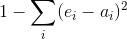
            
Donde "ei" es la salida esperada y "ai" es la salida real. Cuanto mayor sea el valor de fitness, más preciso será. Si el fitness es igual a 1, significa una salida precisa.

Este cálculo de aptitud se implementa en la función eval_genomes. Esta función toma dos argumentos: una lista de genomas (la población actual) y la configuración en un archivo. NEAT espera que la función fitness calcule una aptitud para cada genoma y asigne este valor al miembro de aptitud del genoma.



### CONFIGURACIÓN DEL ALGORITMO NEAT

La documentación de la biblioteca NEAT presenta un archivo de configuración en formato .txt, en el que se puede modificar los parámetros del algoritmo evolutivo. Estos parámetros se mencionan a continuación, con su respectiva definición y valores posibles a utilizar (si se mencionan), así como los valores elegidos como resultantes del la mejor combinación para la resolución de este problema estas definiciones fueron obtenidas de la documentación de NEAT, cabe destacar que el entendimiento de estos es primordial para realizar un correcto estudio exhaustivo de los mismos.

Dado que para esta tarea, el estudio exhaustivo de los factores se hace de forma distinta al variar los valores de estos parámetros en un archivo .txt llamado config, por lo que se realiza un estudio de los efectos de la variación de varios parámetros por separado como lo son la población inicial, la tasa de mutación y la función de activación:

●fitness criterion: rige si se corre el algoritmo a manera de maximización max, minimización min, o promedio mean. En este caso se utiliza maximización.

●fitness threshold: a este valor de calidad es al que se desea llegar para finalizar el algoritmo. El utilizado es de 3.9.

●pop size: población inicial al ejecutar el genético. Se utilizó un valor de 150.

●reset on extinction: en el caso en el que todas las especies se extingan, se genera una nueva población completamente nueva.

●activation default: función de activación a asignar a los nodos que son creados. En este caso se utiliza sigmoide, debido a que no se logró implementar de manera satisfactoria las otras funciones de activación.

●activation mutate rate: probabilidad para que un nodo desarrolle una función de activación distinta a la predeterminada. Se utiliza 0, para reducir el número de pruebas realizadas.

●activation options: lista de las funciones de activación disponibles para el algoritmo. Se utiliza igualmente sigmoide

●node aggregation options:  estos parámetros no fueron modificados. Consisten en aggregation default, aggregation mutate rate y aggregation options. Todos estos valores modifican las funciones de agregación de cada nodo.

●node bias options: estos parámetros modifican en cómo varían los sesgos a la hora de evolucionar el genético. Se deja con los valores predeterminados.

●genome compatibility options: estos parámetros modifican los valores que dictarán qué tan cercano deben estar dos individuos para lograr ser de la misma especie. Se deja con los valores predeterminados.

●conn add prob: probabilidad de que ocurra una mutación en la cual se agregue una conexión.

●conn delete prob: probabilidad de que ocurra una mutación en la cual se borre una conexión.

●connection enable options: estos parámetros modifican qué tan seguido se muta un nodo que está habilitado y se deshabilita, o viceversa. También, dice cuál sería el default de un nodo al ser creado, para este caso se usa en True.

●feed forward: se coloca en True para que la red creada sea del tipo feed forward.

●initial connection: tipo de conexión que se da entre nodos al inicializar el algoritmo. Es este caso se configura de tipo de ”full“.

●node add prob: probabilidad de que ocurra una mutación en la cual se agregue un nodo.

●node delete prob: probabilidad de que ocurra una mutación en la cual se borre un nodo.

●num hidden: cantidad de capas ocultas con las que se desea empezar el algoritmo. Se ha puesto un valor de 0 para empezar desde la topología más sencilla.

●num inputs: número de neuronas de entrada de la red. Por la naturaleza del problema se configura en 2.

●num outputs: al igual que las entradas, la cantidad de neuronas de salida viene dictaminada por la naturaleza del problema, se coloca en 1.

●connection weight options: características de los pesos iniciales de la red neuronal. Se ha dejado todo con sus valores default.

●compatibility threshold: mínimo de la distancia genómica para que dos individuos sean considerados de la misma especie.

●species fitness func: cálculo de las funciones de calidad de las especies específicas, se configura para utilizar maximización.

●max stagnation: al cumplirse esta cantidad de generaciones, sin que una especie vea mejora, se borra esta especie. Se coloca un valor de 20

●species elitism: para evitar que todos los individuos sean borrados al cumplirse las generaciones del parámetro anterior, se fija este parámetro en 2.

●elitism: individuos que serán preservados en cada generación, tomando únicamente en cuenta la calidad. Se utiliza un valor de 2.

●survival threshold: fracción de cada especie que se permite que se reproduzca en cada generación.




## IMPLEMENTACIÓN DEL ALGORITMO

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

In [2]:
# se le da el valor de las entradas
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
 
# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")

In [3]:
#construcción mediante el método de ANN 
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [5]:
model.fit(training_data, target_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 418ms/step - loss: 0.2706 - binary_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2701 - binary_accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2696 - binary_accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2691 - binary_accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2687 - binary_accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2682 - binary_accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2677 - binary_accuracy: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2673 - binary_accuracy: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2668 - binary_accuracy: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 4ms/ste

In [6]:
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 [==============================] - 0s 101ms/step - loss: 0.2431 - binary_accuracy: 0.7500

binary_accuracy: 75.00%


In [7]:
print (model.predict(training_data).round())

[[1.]
 [1.]
 [1.]
 [0.]]


In [8]:
!pip install neat-python

In [9]:
!pip install visualize


 ****** Running generation 0 ****** 

Population's average fitness: 2.21835 stdev: 0.38087
Best fitness: 2.98719 - size: (1, 2) - species 1 - id 50
Average adjusted fitness: 0.574
Mean genetic distance 1.342, standard deviation 0.444
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.574     0
Total extinctions: 0
Generation time: 0.025 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.37966 stdev: 0.31345
Best fitness: 2.99661 - size: (1, 2) - species 1 - id 191
Average adjusted fitness: 0.534
Mean genetic distance 1.511, standard deviation 0.587
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.534     0
Total extinctions: 0
Generation time: 0.018 sec (0.022 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.36969 stdev: 0

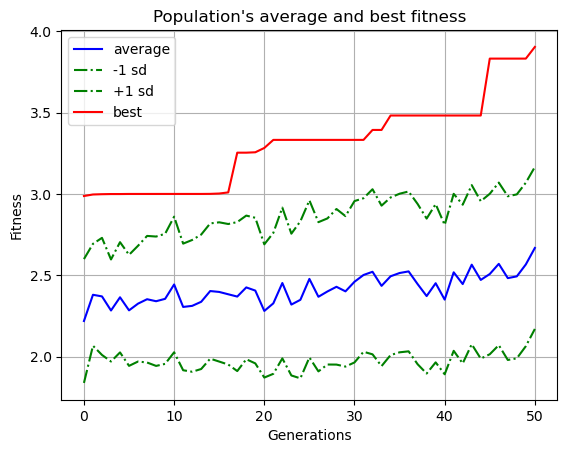

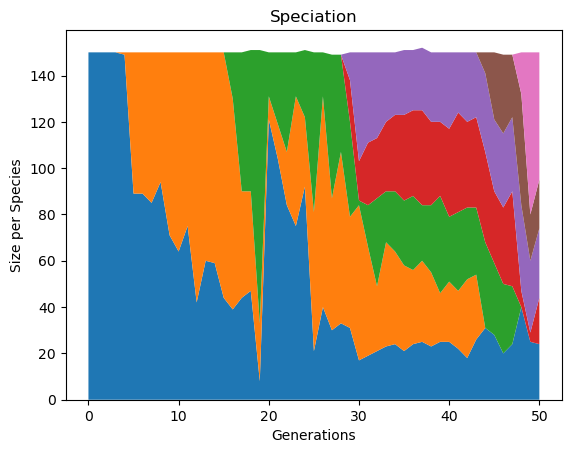

Mean genetic distance 1.743, standard deviation 0.625
Mean genetic distance 1.722, standard deviation 0.609
Mean genetic distance 1.867, standard deviation 0.617
Mean genetic distance 1.790, standard deviation 0.566
Mean genetic distance 1.750, standard deviation 0.574
Mean genetic distance 1.862, standard deviation 0.563
Mean genetic distance 1.852, standard deviation 0.474
Mean genetic distance 1.755, standard deviation 0.478
Mean genetic distance 1.930, standard deviation 0.556
Mean genetic distance 2.015, standard deviation 0.505


In [10]:
#Ejemplo de la XOR con NEAT

from __future__ import print_function
import os
import neat
import visualize


# Entradas y Salidas esperadas
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        
        #Red correspondiente al genoma
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config_file):
    # Carga la configuracion
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

        
         # Se usa para mostrar el procesamiento de numeración de los nodos de entrada y los nodos de salida cuando
         # el nodo de entrada está numerado de -1, -2, -3 ..., el nodo de salida está numerado de 0,1,2 ...

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    
    #Dibuja la red
    visualize.draw_net(config, winner, True, node_names=node_names)
    
    # Grafique la aptitud óptima y promedio, ylog significa que el eje y usa una escala simétrica (log simétrica)
  
    visualize.plot_stats(stats, ylog=False, view=True)
    
    # Visualiza los cambios de población
    visualize.plot_species(stats, view=True)
    
    #restaura la poblacion
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 10)


if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    local_dir = os.path.dirname('')
    config_path = os.path.join(local_dir, 'config.txt')
    run(config_path)

Se puede observar en los resultados de la ANN que el valor de accuracy llega a un 75%, no siento muy óptimo. Para el caso de NEAT, la salida esperada es (0.0 , 1.0 , 1.0 , 0.0) y los obtenidos por NEAT fueron: (0.17493870480542184 , 0.9332256681714084 , 0.999998853023505 , 0.24619939818109005), llegando así a un 3.9043234945038003 de fitness, de un 3.9 propuesto como umbral para un buen resultado. Sin embargo como se habló en las primeras clases del curso, las frontera de decisión de una XOR lógica requiere un poco más de poder computacional, por lo que el costo de este y el tiempo de implementación del algoritmo será mucho mayor.



## REFERENCIAS

[1] Crespo, J (2021), “Tema 4: Neuroevolución basada en NEAT (NEUROEVOLUTION OF AUGMENTING TOPOLOGIES)”. Área Académica de Ingeniería Mecatrónica.

[2] Andries P. Engelbrecht “Computational Intelligence: An Introduction”. (2ª edición, 2007, Wiley).
